# Premier League Transfer Analysis

The Premier League is the top level of the English football league system and is the most watched sports league in the world. The league is known for its high spending on player transfers each season, with clubs battling each other to secure the services of promising players.

In this notebook, we'll perform a comprehensive analysis on a dataset containing Premier League transfer data since the 1992/93 season. The data, sourced from Transfermarkt, includes details such as club names, player names, their age, position, fee, transfer movement, transfer period, year and season. 
This data was scrape and compiled and published on github: 
https://github.com/ewenme/transfers/blob/master/data/premier-league.csv

We'll seek to answer the following questions:
- How many players have been transferred in per club?
- How much have the current 20 premier league teams spent throughout their individual stint in the premier league?
- How much have the teams who have always been present in the premier league spent on incoming signings?
- How much have they spent on players in different positions; Goalkeeper, Defence, Midfield, Attack?
- What is the net spend of teams over the history of the Premier League?
- What is the net spend of teams who achieved the top 8 in the current season?

## Section 1: Data Loading and Cleaning

### Subsection 1.1: Import the Relevant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Subsection 1.2: Load the Data

In [3]:
df = pd.read_csv('premier-league.csv')

### Subsection 1.2: Inspect the Data

Display the first 5 rows

In [4]:
print(df.head())

          club_name       player_name   age     position club_involved_name  \
0  Middlesbrough FC      Tommy Wright  26.0  Left Winger          Leicester   
1  Middlesbrough FC  Jonathan Gittens  28.0      defence        Southampton   
2  Middlesbrough FC      Chris Morris  28.0   Right-Back             Celtic   
3  Middlesbrough FC       Ben Roberts  17.0   Goalkeeper           Boro U18   
4  Middlesbrough FC         Andy Todd  17.0  Centre-Back           Boro U18   

       fee transfer_movement transfer_period  fee_cleaned     league_name  \
0  €910Th.                in          Summer         0.91  Premier League   
1  €250Th.                in          Summer         0.25  Premier League   
2        ?                in          Summer          NaN  Premier League   
3        -                in          Summer          NaN  Premier League   
4        -                in          Summer          NaN  Premier League   

   year     season  country  
0  1992  1992/1993  England  
1 

Display the number of rows and columns

In [5]:
print(df.shape)

(23675, 13)


This provides a summary of the dataset, including the column names, data types, and the number of non-null values in each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23675 entries, 0 to 23674
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           23675 non-null  object 
 1   player_name         23675 non-null  object 
 2   age                 23660 non-null  float64
 3   position            23675 non-null  object 
 4   club_involved_name  23675 non-null  object 
 5   fee                 23671 non-null  object 
 6   transfer_movement   23675 non-null  object 
 7   transfer_period     23675 non-null  object 
 8   fee_cleaned         9040 non-null   float64
 9   league_name         23675 non-null  object 
 10  year                23675 non-null  int64  
 11  season              23675 non-null  object 
 12  country             23675 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


### Subsection 1.3: Clean the Data

Identify and count missing values in each column

In [7]:
print(df.isnull().sum())

club_name                 0
player_name               0
age                      15
position                  0
club_involved_name        0
fee                       4
transfer_movement         0
transfer_period           0
fee_cleaned           14635
league_name               0
year                      0
season                    0
country                   0
dtype: int64


Remove rows that contain a null value

In [10]:
df.dropna(inplace=True)
print(df.shape)

(9035, 13)


For the following analysis these columns are not needed therefore they will be removed.

In [11]:
df.drop(['club_involved_name', 'fee', 'transfer_period', 'league_name', 'country'], axis=1, inplace=True)
print(df.shape)

(9035, 8)


Only teams from the current season will be kept in the dataframe.

In [12]:
current_epl_clubs = [
    'AFC Bournemouth',
    'Arsenal FC',
    'Aston Villa',
    'Brentford FC',
    'Brighton & Hove Albion',
    'Chelsea FC',
    'Crystal Palace',
    'Everton FC',
    'Fulham FC',
    'Leeds United',
    'Leicester City',
    'Liverpool FC',
    'Manchester City',
    'Manchester United',
    'Newcastle United',
    'Nottingham Forest',
    'Southampton FC',
    'Tottenham Hotspur',
    'West Ham United',
    'Wolverhampton Wanderers'
]

In [13]:
df_cleaned = df[df['club_name'].isin(current_epl_clubs)].reset_index(drop=True)
df_cleaned

,club_name,player_name,age,position,transfer_movement,fee_cleaned,year,season
0,Manchester United,Dion Dublin,23.0,Centre-Forward,in,1.500,1992,1992/1993
1,Manchester United,Pat McGibbon,18.0,Centre-Back,in,0.225,1992,1992/1993
2,Manchester United,Mark Robins,22.0,Centre-Forward,out,1.000,1992,1992/1993
3,Manchester United,Neil Webb,28.0,Central Midfield,out,0.925,1992,1992/1993
4,Manchester United,Mal Donaghy,34.0,Left-Back,out,0.200,1992,1992/1993
...,...,...,...,...,...,...,...,...
5777,Wolverhampton Wanderers,Craig Dawson,32.0,Centre-Back,in,3.750,2022,2022/2023
5778,Wolverhampton Wanderers,Daniel Bentley,29.0,Goalkeeper,in,0.057,2022,2022/2023
5779,Wolverhampton Wanderers,Leonardo Campana,22.0,Centre-Forward,out,2.700,2022,2022/2023
5780,Wolverhampton Wanderers,Connor Ronan,24.0,Central Midfield,out,0.570,2022,2022/2023


As there are instances of the same player being transfered multiple times to the same club, duplicates will not be dropped

## Section 2: Data Exploration and Analysis

### Subsection 2.1: Analysis of Number of Players Transferred In

In [15]:
# Group the DataFrame by 'club_name' and count the occurrences of 'transfer_movement' equal to 'in'
transfers_in = df_cleaned[df_cleaned['transfer_movement'] == 'in'].groupby('club_name').size().reset_index(name='total_transfers_in')

# Sort the table in descending order based on 'total_in_transfers'
transfers_in_sorted = transfers_in.sort_values(by='total_transfers_in', ascending=False)

# Reset the index to start from 0
transfers_in_sorted.reset_index(drop=True, inplace=True)

# Output the resulting table
print(transfers_in_sorted)

                  club_name  total_transfers_in
0           West Ham United                 228
1          Newcastle United                 218
2         Tottenham Hotspur                 208
3                Chelsea FC                 206
4              Liverpool FC                 200
5           Manchester City                 188
6                Everton FC                 185
7               Aston Villa                 166
8                Arsenal FC                 157
9            Southampton FC                 151
10                Fulham FC                 140
11        Manchester United                 132
12           Leicester City                 117
13           Crystal Palace                 100
14             Leeds United                  78
15  Wolverhampton Wanderers                  75
16   Brighton & Hove Albion                  56
17          AFC Bournemouth                  45
18        Nottingham Forest                  39
19             Brentford FC             

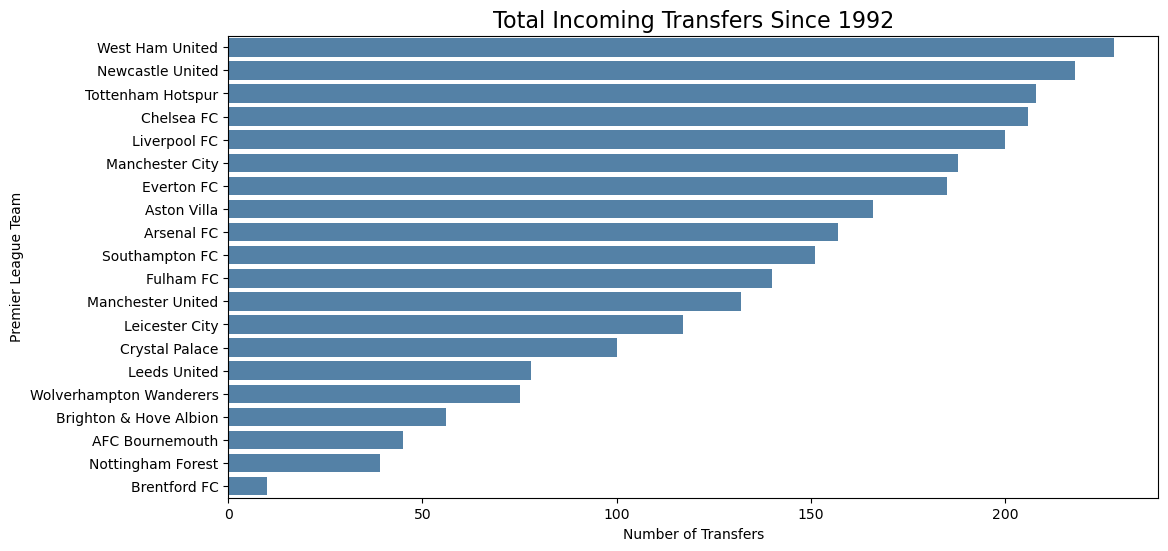

In [16]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_transfers_in', y='club_name', data=transfers_in_sorted, color='steelblue')

# Set the title and labels
plt.title('Total Incoming Transfers Since 1992', fontsize=16)
plt.xlabel('Number of Transfers')
plt.ylabel('Premier League Team')

# Show the plot
plt.show()

The total number of players that each team has acquired since their separate stays in the Premier League is displayed in this bar chart. The following are a few interpretations:

-The clubs with the most inbound transfers are West Ham United, Newcastle United, and Tottenham Hotspur. This can be a sign of a proactive approach to the transfer market and regular squad changes. This tactic may have been adopted in response to player departures, managerial changes, or efforts to raise performance.

-Because of their more recent promotions to the Premier League, teams like Brighton & Hove Albion, AFC Bournemouth, and Brentford FC have made fewer overall moves. To ensure Premier League survival, their policy looks to favour fewer, top-tier additions rather than a large number of moves.

It is important to remember that the quantity of moves does not always indicate the calibre of those transfers or the team's success. While a low number of transfers could be an indication of a strong, stable team or a prosperous youth academy, a high number of transfers might be a sign of instability or frequently changing team tactics.

### Subsection 2.2: Analysis of Spending by Current 20 Premier League Teams

In [18]:
# Filter only the rows where 'transfer_movement' is 'in', meaning the club bought a player
df_in = df_cleaned[df_cleaned['transfer_movement'] == 'in']

# Sum the fees for each club
club_spending = df_in.groupby('club_name')['fee_cleaned'].sum().reset_index()

print(club_spending)


                  club_name  fee_cleaned
0           AFC Bournemouth      357.210
1                Arsenal FC     1678.505
2               Aston Villa     1017.562
3              Brentford FC       88.200
4    Brighton & Hove Albion      383.320
5                Chelsea FC     3148.280
6            Crystal Palace      439.179
7                Everton FC     1166.932
8                 Fulham FC      473.495
9              Leeds United      515.938
10           Leicester City      706.130
11             Liverpool FC     1918.105
12          Manchester City     2494.504
13        Manchester United     2368.330
14         Newcastle United     1239.252
15        Nottingham Forest      214.688
16           Southampton FC      795.404
17        Tottenham Hotspur     1695.198
18          West Ham United     1115.872
19  Wolverhampton Wanderers      591.547


In [19]:
# Sort the data in descending order
club_spending = club_spending.sort_values(by='fee_cleaned', ascending=False).reset_index(drop=True)

print(club_spending)

                  club_name  fee_cleaned
0                Chelsea FC     3148.280
1           Manchester City     2494.504
2         Manchester United     2368.330
3              Liverpool FC     1918.105
4         Tottenham Hotspur     1695.198
5                Arsenal FC     1678.505
6          Newcastle United     1239.252
7                Everton FC     1166.932
8           West Ham United     1115.872
9               Aston Villa     1017.562
10           Southampton FC      795.404
11           Leicester City      706.130
12  Wolverhampton Wanderers      591.547
13             Leeds United      515.938
14                Fulham FC      473.495
15           Crystal Palace      439.179
16   Brighton & Hove Albion      383.320
17          AFC Bournemouth      357.210
18        Nottingham Forest      214.688
19             Brentford FC       88.200


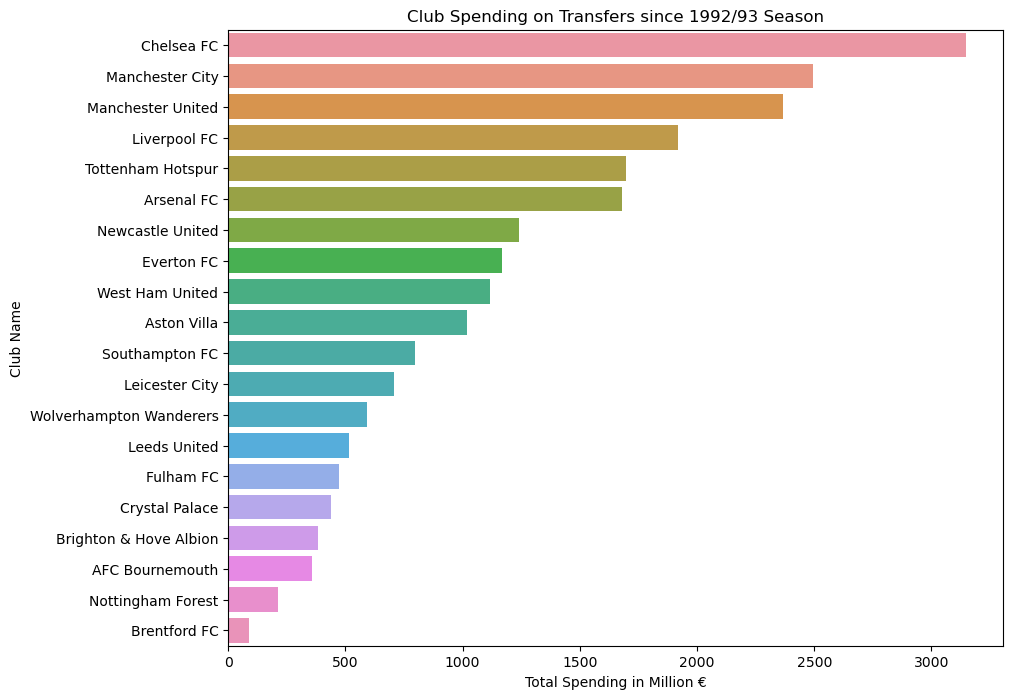

In [20]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the bar plot
sns.barplot(y='club_name', x='fee_cleaned', data=club_spending)

# Add labels and title
plt.xlabel('Total Spending in Million €')
plt.ylabel('Club Name')
plt.title('Club Spending on Transfers since 1992/93 Season')

# Show the plot
plt.show()

This chart shows the total transfer fees spent by each club since their respective stints in the Premier League. When compared to the table of total transfers in, some key observations can be made:

The Premier League's largest spenders are Chelsea FC, Manchester City, Manchester United, and Liverpool FC. This is consistent with their standing as some of the most strong teams in terms of finances and their capacity to attract elite talent. The overall number of moves for Manchester United and Liverpool don't match this high level of spending, demonstrating that they frequently make fewer but more expensive deals. The high investment and somewhat high number of transfers made by Manchester City and Chelsea point to a regular and high-profile transfer strategy.

Teams like Brighton & Hove Albion and AFC Bournemouth have maintained their Premier League status with relatively low spending, demonstrating efficiency in the transfer market, up until Bournemouth's relegation in 2020.

### Subsection 2.3: Analysis of Spending by Position

To carry out analysis on the position of players transferred in, the 'position' column will need to be remapped to group the positions by: Goalkeeper, Defender, Midfielder, Attacker

In [21]:
# Dictionary for mapping
position_mapping = {
    'Goalkeeper': 'Goalkeeper',
    'defence': 'Defender',
    'Right-Back': 'Defender',
    'Centre-Back': 'Defender',
    'Left-Back': 'Defender',
    'Defensive Midfield': 'Midfielder',
    'Left Midfield': 'Midfielder',
    'Attacking Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'midfield': 'Midfielder',
    'Right Midfield': 'Midfielder',
    'Left Winger': 'Attacker',
    'Right Winger': 'Attacker',
    'Centre-Forward': 'Attacker',
    'attack': 'Attacker',
    'Second Striker': 'Attacker'
}

In [22]:
# Create a copy of the cleaned dataframe
df_position = df_cleaned.copy()

In [23]:
# Map the 'position rows' with the dictionary above
df_position['position'] = df_position['position'].map(position_mapping)

To make the the stacked bar chart more readable abbreviations will be used for the 'club_name'

In [27]:
abbreviation_dict = {
    'AFC Bournemouth': 'BOU',
    'Arsenal FC': 'ARS',
    'Aston Villa': 'AVL',
    'Brentford FC': 'BRE',
    'Brighton & Hove Albion': 'BHA',
    'Chelsea FC': 'CHE',
    'Crystal Palace': 'CRY',
    'Everton FC': 'EVE',
    'Fulham FC': 'FUL',
    'Leeds United': 'LEE',
    'Leicester City': 'LEI',
    'Liverpool FC': 'LIV',
    'Manchester City': 'MCI',
    'Manchester United': 'MUN',
    'Newcastle United': 'NEW',
    'Nottingham Forest': 'NOT',
    'Southampton FC': 'SOU',
    'Tottenham Hotspur': 'TOT',
    'West Ham United': 'WHU',
    'Wolverhampton Wanderers': 'WOL'
}

In [33]:
# Map the 'club_names' with the dictionary above
df_position['club_name'] = df_position['club_name'].map(abbreviation_dict)

In [41]:
# Pivot the data so that we have club names as index, positions as columns and the sum of fees as values
pivot_df = df_position.pivot_table(values='fee_cleaned', index='club_name', columns='position', aggfunc='sum', fill_value=0)

# Reorder the columns  of positions
column_order = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]
pivot_df = pivot_df.reindex(columns=column_order)

pivot_df.head()

position,Goalkeeper,Defender,Midfielder,Attacker
club_name,,,,
ARS,156.310,600.860,818.975,920.140
AVL,52.480,416.652,377.434,665.564
BHA,16.600,258.200,157.500,210.540
BOU,12.565,164.760,66.540,192.510
BRE,1.000,32.200,10.000,49.600


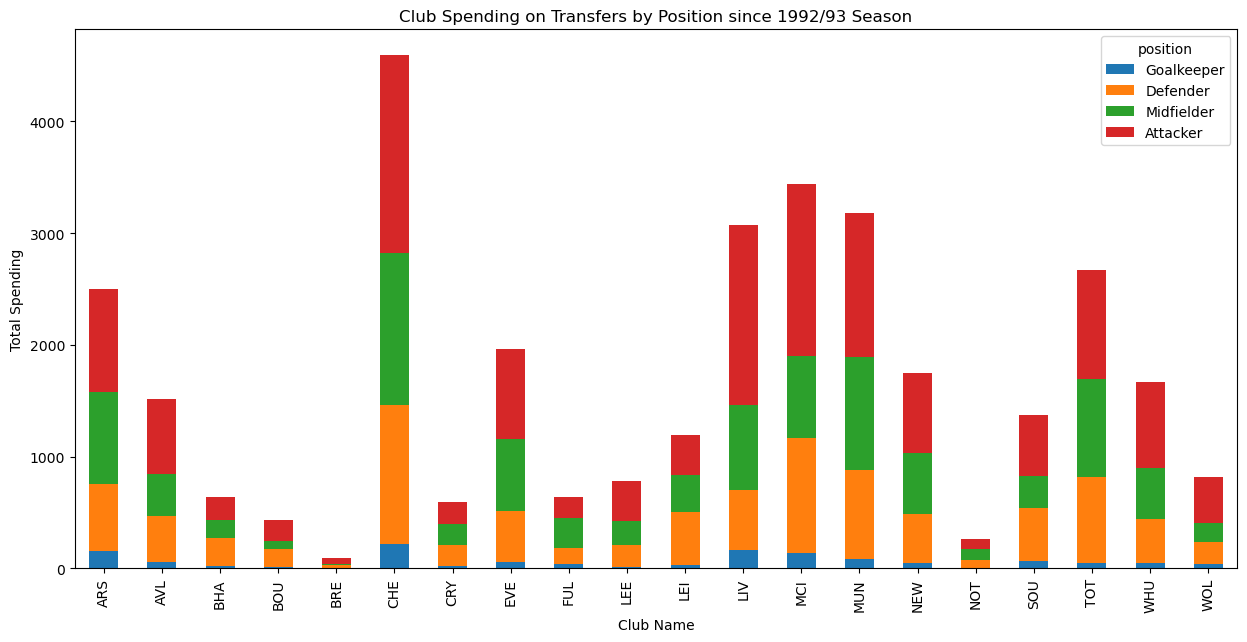

In [39]:
# plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.xlabel('Club Name')
plt.ylabel('Total Spending')
plt.title('Club Spending on Transfers by Position since 1992/93 Season')

# show the plot
plt.show()

There is a noticeable investment on attackers by several clubs. This may be because goals are crucial to winning games, which improve league performance, or because attacking players frequently fetch higher market prices.

Goalkeepers typically receive far less funding than other roles. This might be because teams don't necessarily need as many goalkeepers, and also because they typically cost less to transfer than outfield players. In addition, compared to outfield players, they frequently have lengthier careers with the same club.

### Subsection 2.4: Analysis of Net Spend Over History

The term "net spend" describes the difference between a club's overall spending on player acquisition and its overall revenue from player sales.

In [42]:
# Filter only the rows where 'transfer_movement' is 'in', meaning the club bought a player
df_incoming = df_cleaned[df_cleaned['transfer_movement'] == 'in']

# Sum the fees for each club and each season
club_season_incoming = df_incoming.groupby(['club_name', 'season'])['fee_cleaned'].sum()

In [43]:
# Filter only the rows where 'transfer_movement' is 'out', meaning the club sold a player
df_outgoing = df_cleaned[df_cleaned['transfer_movement'] == 'out']

# Sum the fees for each club and each season
club_season_outgoing = df_outgoing.groupby(['club_name', 'season'])['fee_cleaned'].sum()

In [52]:
# Calculate net spend for each club and each season
club_season_net_spend = club_season_incoming - club_season_outgoing

# Convert the series to a dataframe
club_season_net_spend = club_season_net_spend.to_frame()

# Reset index
club_season_net_spend.reset_index(inplace=True)

# Set the column name directly
club_season_net_spend.columns = ['club_name', 'season', 'net_spend']

# Some clubs might have only incoming or outgoing transfers in some seasons. Fill NaN values with 0.
club_season_net_spend['net_spend'] = club_season_net_spend['net_spend'].fillna(0)

# Convert the season to integer and sort the dataframe
club_season_net_spend['season'] = club_season_net_spend['season'].apply(lambda x: int(x.split('/')[0]))
club_season_net_spend = club_season_net_spend.sort_values(by='season')

club_season_net_spend.head()

,club_name,season,net_spend
313,Nottingham Forest,1992,-3.440
104,Crystal Palace,1992,-0.527
343,Tottenham Hotspur,1992,-3.025
37,Aston Villa,1992,3.036
254,Manchester United,1992,1.306


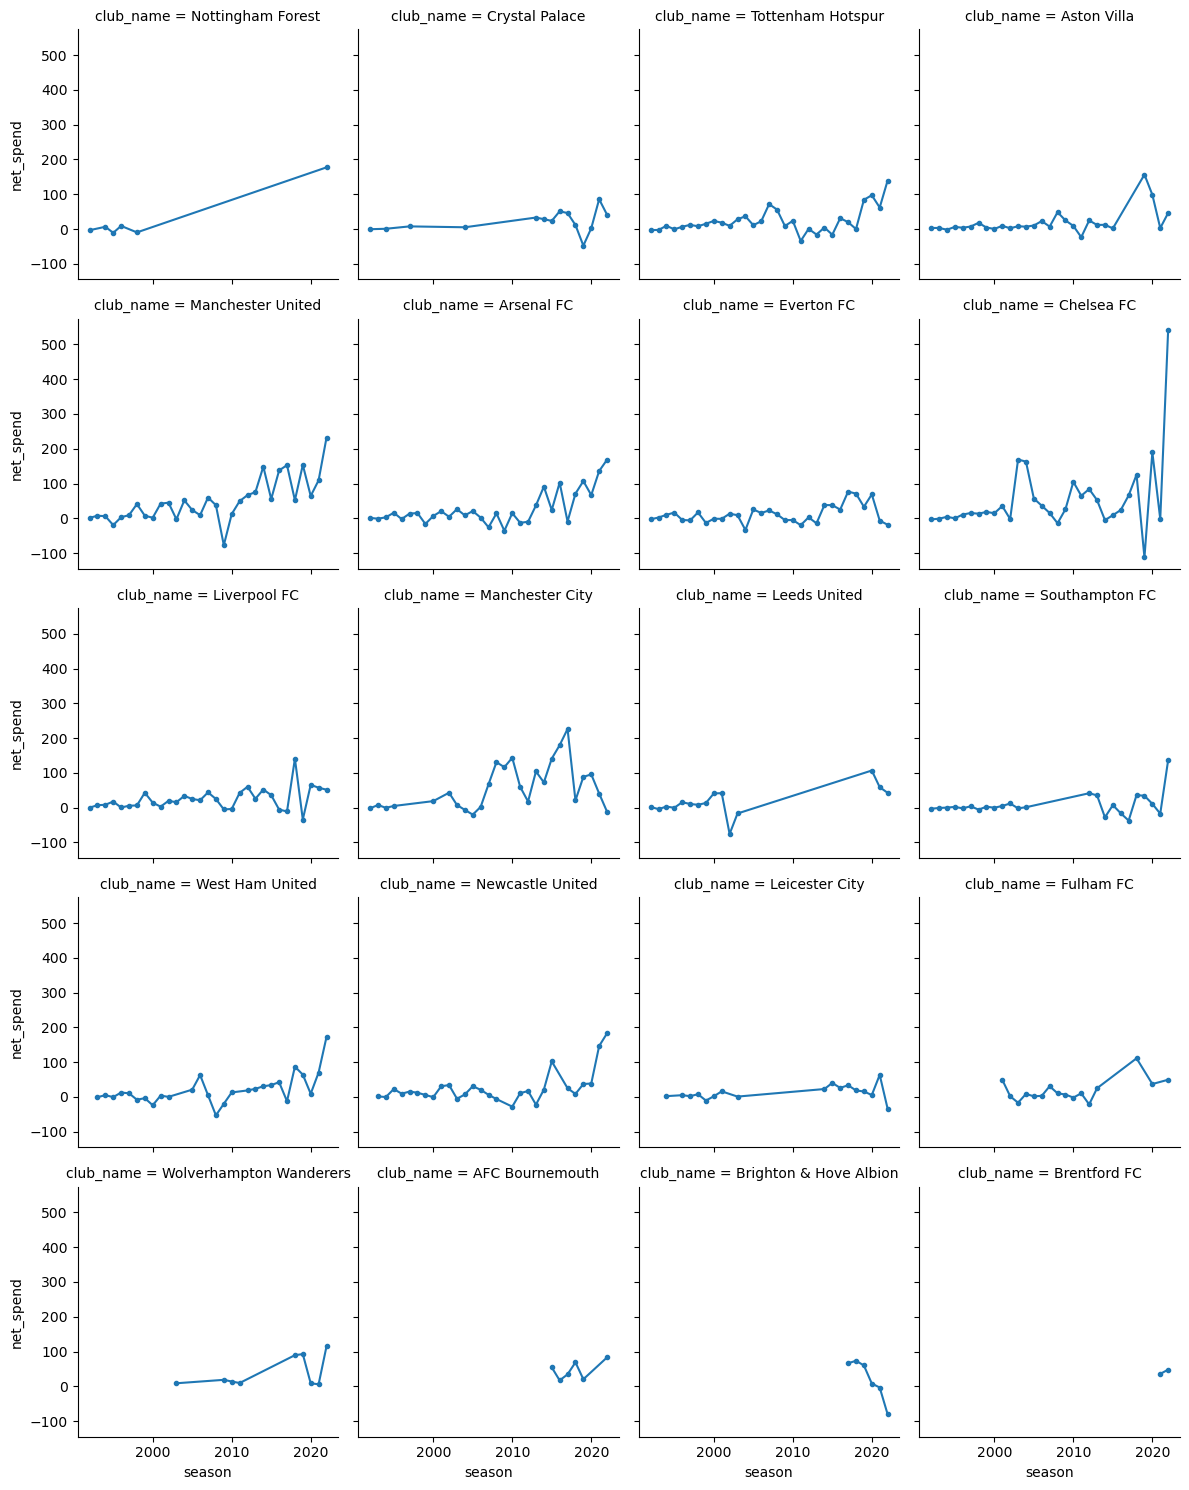

In [47]:
g = sns.FacetGrid(club_season_net_spend, col="club_name", col_wrap=4, height=3)
g = g.map(plt.plot, "season", "net_spend", marker=".")

Line graphs make comparisons challenging because some teams have not consistently competed in the main league. As a result, a heatmap will be employed since it is easier to see how each teams' netspend differs from one another.

Also to highlight the difference in net spend history only the top 8 teams, those that achieved european places, from this season will be highlighted.

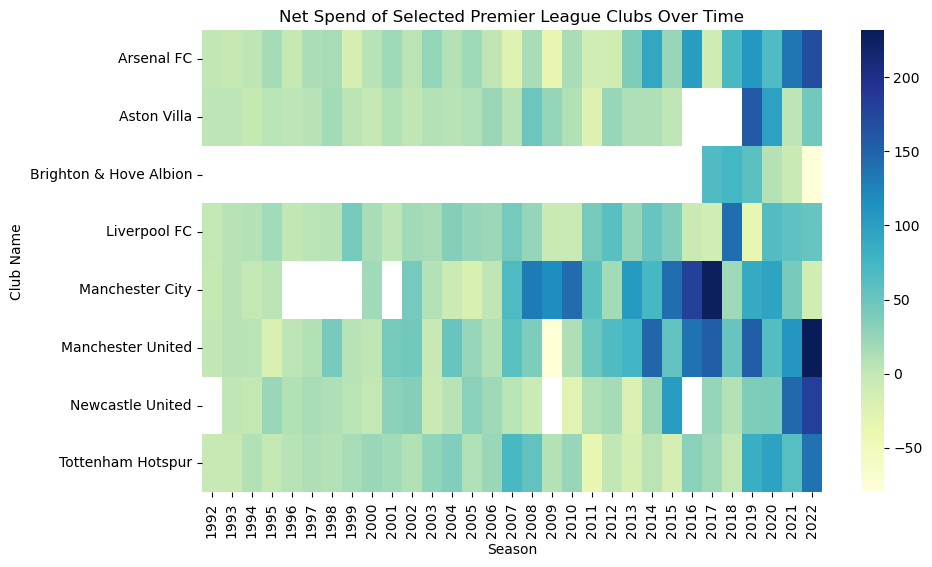

In [59]:
# List containing top 8 clubs
subset_clubs = ['Manchester City', 'Arsenal FC', 'Manchester United', 'Newcastle United','Liverpool FC', 'Brighton & Hove Albion','Aston Villa','Tottenham Hotspur']

# Filter out clubs
df_clubs = club_season_net_spend[club_season_net_spend['club_name'].isin(subset_clubs)]


# Pivot the data for heatmap
df_subset_pivot = df_clubs.pivot(index="club_name", columns="season", values="net_spend")

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_subset_pivot, cmap="YlGnBu")

plt.title('Net Spend of Selected Premier League Clubs Over Time')
plt.xlabel('Season')
plt.ylabel('Club Name')
plt.show()


As we proceed from 1992 to 2022, there appears to be an overall upward trend in net expenditures. This implies that the transfer market has expanded over time as Premier League clubs have increased their spending. Increased earnings from sponsorships, television rights, and other commercial sources may be to blame for this.

When it comes to transfers, different clubs have varying capacities and plans. Some teams have large net spending on a consistent basis, which implies they frequently spend more on new players than they make through player sales. Other clubs may be more balanced in their player acquisition and disposal decisions or have less financial clout if their net spending are lower or fluctuate.


## Section 3: Conclusions and Insights

With an emphasis on net cost, the number of incoming transfers, and spend by player position, this analysis was done to address a variety of questions about transfer activity in the Premier League throughout time. Although the dataset we used provides a wealth of data to answer these questions, it's important to be aware of some limitations, such as hidden transfer fees, a lack of information on player salaries, and possible inaccuracies in transfer fees as a result of inflation and currency exchange rates.

Over time, there has been a noticeable increase in activity in the Premier League transfer market. The overall increased trend in both the volume of new players joining the league and the clubs' net spending points to this. Notably, West Ham United has brought in the most players, although spending has not increased as a result. The clubs with the largest expenditures have been Chelsea FC, Manchester City, and Manchester United, demonstrating the strength of these organisations' finances.

When examining spending by position, it appears that attacking players are more frequently invested in by most teams, which is consistent with the high-value role that these players frequently play on a squad. However, the distribution of spending by each club reflects its particular circumstances and plan.

It is obvious that not all teams adhere to the same trend when it comes to net expenditure. Some clubs consistently spend a lot of money on players, which is indicative of their player acquisition approach. Others exhibit more consistent or variable net expenditure, suggesting a range of investment methods, financial resources, and demands dependent on their output and objectives.

The transfer market is dynamic and expanding, clubs use a variety of player acquisition strategies, and creating competitive teams requires a sizable investment. As a result, our analysis offered insightful information into the transfer activities of Premier League clubs. But a more full picture would include information on player salaries, a list of every transfer price.